In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
import matplotlib.pyplot as plt
import numpy as np

In [14]:
class_names = ["Cat", "Dog"]
batch_size = 64

### Load the data

In [15]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
) 
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [16]:
train_data = train_datagen.flow_from_directory(
    'Images/training_set',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)
test_data = test_datagen.flow_from_directory(
    'Images/test_set',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 14531 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


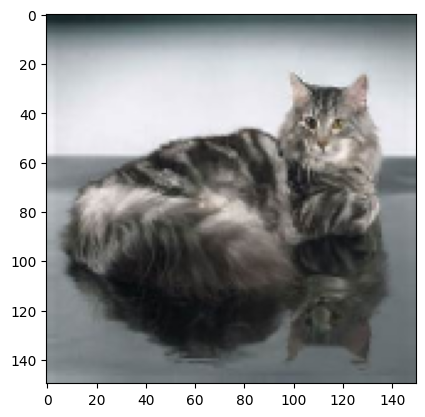

In [17]:
plt.imshow(train_data[0][0][0])
plt.show()

In [6]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation("relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))


model.summary()

/Users/sundar/miniforge3/envs/DL/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-05 15:53:44.342417: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-05-05 15:53:44.342456: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-05 15:53:44.342469: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-05 15:53:44.342530: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-05 15:53:44.342549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [8]:
history = model.fit(
    train_data,
    epochs=25,
    validation_data=test_data,
    callbacks=[early_stopping]
)

Epoch 1/25


2024-05-05 15:53:48.399209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/sundar/miniforge3/envs/DL/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


455/455 ━━━━━━━━━━━━━━━━━━━━ 38s 79ms/step - accuracy: 0.6218 - loss: 0.6495 - val_accuracy: 0.6185 - val_loss: 0.6188
Epoch 2/25
455/455 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - accuracy: 0.7107 - loss: 0.5594 - val_accuracy: 0.7185 - val_loss: 0.5720
Epoch 3/25
455/455 ━━━━━━━━━━━━━━━━━━━━ 35s 77ms/step - accuracy: 0.7469 - loss: 0.5162 - val_accuracy: 0.7685 - val_loss: 0.4768
Epoch 4/25
455/455 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.7857 - loss: 0.4572 - val_accuracy: 0.8025 - val_loss: 0.4245
Epoch 5/25
455/455 ━━━━━━━━━━━━━━━━━━━━ 36s 79ms/step - accuracy: 0.8074 - loss: 0.4253 - val_accuracy: 0.8200 - val_loss: 0.3978
Epoch 6/25
455/455 ━━━━━━━━━━━━━━━━━━━━ 35s 77ms/step - accuracy: 0.8243 - loss: 0.4051 - val_accuracy: 0.8250 - val_loss: 0.3994
Epoch 7/25
455/455 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.8331 - loss: 0.3820 - val_accuracy: 0.8210 - val_loss: 0.3923
Epoch 8/25
455/455 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.8473 - loss: 0.3582 - val_accurac

In [13]:
model.save('first.h5')

In [12]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

63/63 - 1s - 18ms/step - accuracy: 0.8400 - loss: 0.3693
Test Loss:  0.3693334758281708
Test Accuracy:  0.8399999737739563


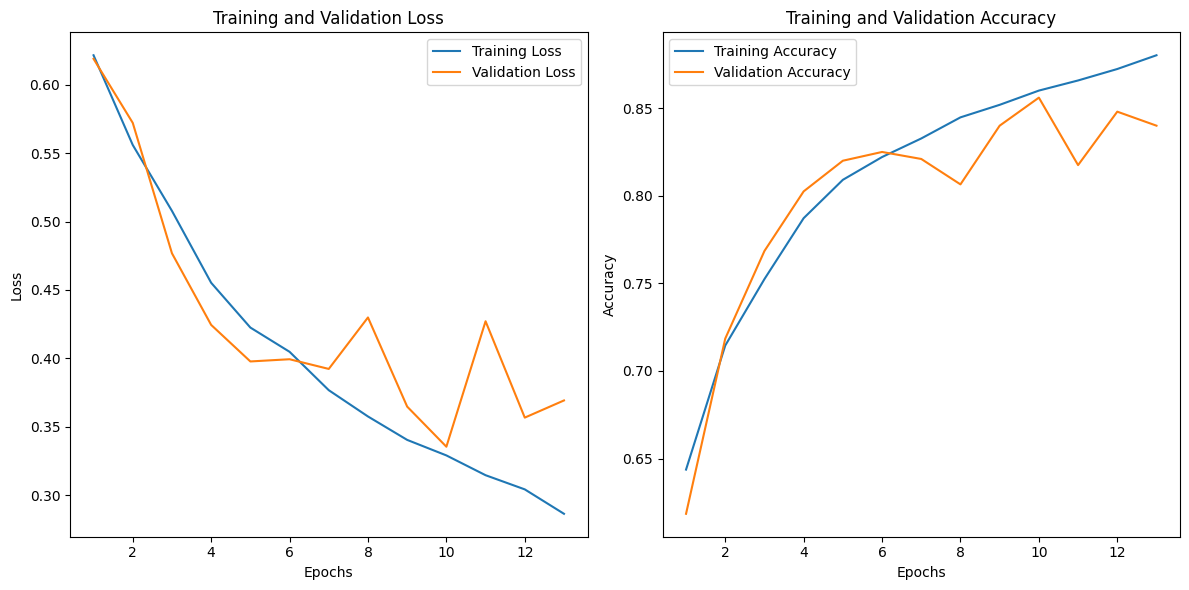

In [10]:
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Predict Model

In [23]:
import cv2 as cv
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array

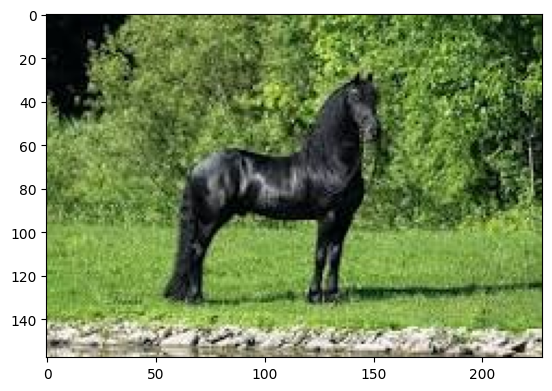

In [65]:
model = tf.keras.models.load_model('first.h5')
path_ = r"Images/single_prediction/img_6.jpg"
test_img = cv.imread(path_)
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
plt.imshow(test_img)

In [66]:
print(test_img.shape)
test_img1 = image.load_img(path_, target_size=(150,150))
test_img1 = img_to_array(test_img1)
test_img1 = np.expand_dims(test_img1, axis=0)
test_img1 = test_img1.astype("float32") / 255
print(test_img1.shape)

(158, 228, 3)
(1, 150, 150, 3)


In [67]:
pred = model.predict(test_img1)
print(pred)
list1 = [round(i) for i in pred[0]]
cd = list1.index(1)
print(list1)
if cd == 0:
    print("It's a Cat")
elif cd == 1:
    print("It's a Dog")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[2.7679183e-04 7.7774888e-01 2.2197428e-01]]
[0, 1, 0]
It's a Dog
